<center><h1>Assignment 2b</h1></center>




- **Name: Prince**
- **Roll No: 2018IMT-071**
- **Course: Machine Learning Lab**
- **Course Code: ITIT-4107**
- **Deadline: 25 September 2021**

Importing necessary library for completing the classification. Libraries used are NumPy, scikitlearn, matplotlib, Pandas

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import classification_report
from tqdm import tqdm
from time import time
from scipy.stats import multivariate_normal as mvn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Converting the MNIST dataset original lecun files to CSV

In [2]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

convert("train-images.idx3-ubyte", "train-labels.idx1-ubyte",
"mnist_train.csv", 60000)
convert("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte",
"mnist_test.csv", 10000)

In [3]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

Renaming our label columns in train and test data set

In [4]:
df_train.rename(columns={'5':'label'}, inplace=True)
df_test.rename(columns={'7':'label'}, inplace=True)

Saving our altered datasets to original csv files

In [5]:
df_train.to_csv('mnist_train_final.csv', index=False)
df_test.to_csv('mnist_test_final.csv', index=False)

Reading our MNIST dataset from new CSV files


In [6]:
df_train = pd.read_csv('mnist_train_final.csv')
df_test = pd.read_csv('mnist_test_final.csv')

Generating first 5 rows of our test and train set to get the intuition of dataset

In [7]:
df_train.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Extracting labels and storing it to 'labels_train'

In [9]:
labels_train = df_train['label'].to_numpy()


Extracting our training digits

In [10]:
df_digits = df_train.drop('label',axis=1)


Representing our digit image from the df_train index=1 i.e. digit 4

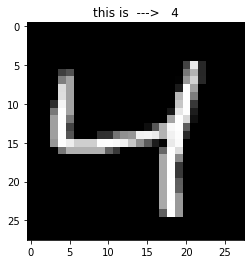

In [11]:
index = 1
digits_data_train = df_digits.to_numpy()
digit = digits_data_train[index]

#flattening the matrix

digit = digit.reshape(28,28)
plt.title('this is  --->   ' + str(labels_train[index]))
plt.imshow(digit, cmap='gray')

# Train Test Data Split

In [12]:
X_train=df_digits
y_train=df_train['label']

In [13]:
df_digits_test=df_test.drop('label',axis=1)

In [14]:
X_test=df_digits_test
y_test=df_test['label']

# Naive Bayes Classifier-smoothing func

In [19]:
def NaiveBayes(X_train, y_train, X_test,smoothing):
    curve_data = dict()
    probab_prior= dict()
    training_label = set(y_train)
    #testing_label = set(y_test)
    for c in training_label:
        current_X = X_train[y_train==c]
        curve_data[c] = {'mean':current_X.mean(axis=0)+smoothing/2,'cov' :current_X.var(axis=0)+smoothing}
        probab_prior[c] = float(len([y_train==c]))/len(y_train)
        N, D = X_test.shape
        Probabilties = np.zeros((N, len(curve_data))) 
   
        for c, g in curve_data.items():
            mean, cov = g['mean'], g['cov']
            Probabilties[:,c] = mvn.logpdf(X_test, mean=mean, cov=cov) + np.log(probab_prior[c])
        y_hat = np.argmax(Probabilties, axis=1)
    
    return y_hat

Making predictions

In [20]:
y_pred=NaiveBayes(X_train, y_train, X_test,10)

# Error Analysis and Report

In [21]:
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[ 873    0    8    6    3   12   26    1   47    4]
 [   0 1081    5    5    0    3    7    0   33    1]
 [  16   16  736   41   11    7   74    8  115    8]
 [   5   30   31  775    4   21   22   19   49   54]
 [   6    2   12    3  595   13   28    6   23  294]
 [  20   15    9   86   29  565   24    8   89   47]
 [   8    9   13    2    3   20  884    0   18    1]
 [   0   14   10   11   22    2    3  807   20  138]
 [   8   65   12   31   16   34    8    7  704   89]
 [   4    7    6    8   34    1    0   25   22  902]]


In [22]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       980
           1       0.87      0.95      0.91      1135
           2       0.87      0.71      0.79      1032
           3       0.80      0.77      0.78      1010
           4       0.83      0.61      0.70       982
           5       0.83      0.63      0.72       892
           6       0.82      0.92      0.87       958
           7       0.92      0.79      0.85      1027
           8       0.63      0.72      0.67       974
           9       0.59      0.89      0.71      1009

    accuracy                           0.79      9999
   macro avg       0.81      0.79      0.79      9999
weighted avg       0.81      0.79      0.79      9999

